In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('train.csv')
df=df1.append(df2)

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,NaN
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,NaN
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,NaN
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,NaN


In [ ]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
SalePrice        0.499829
Length: 81, dtype: float64

In [ ]:
##dropping of null values in saleprice feature only
df.dropna(subset='SalePrice',inplace=True)
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [ ]:
num_f=df.select_dtypes(float)
col_f=df.select_dtypes(object)
num_i=df.select_dtypes(int)

In [ ]:
num_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtFinSF1    1460 non-null   float64
 3   BsmtFinSF2    1460 non-null   float64
 4   BsmtUnfSF     1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   float64
 6   BsmtFullBath  1460 non-null   float64
 7   BsmtHalfBath  1460 non-null   float64
 8   GarageYrBlt   1379 non-null   float64
 9   GarageCars    1460 non-null   float64
 10  GarageArea    1460 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(12)
memory usage: 148.3 KB


In [ ]:
num_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   1stFlrSF       1460 non-null   int64
 8   2ndFlrSF       1460 non-null   int64
 9   LowQualFinSF   1460 non-null   int64
 10  GrLivArea      1460 non-null   int64
 11  FullBath       1460 non-null   int64
 12  HalfBath       1460 non-null   int64
 13  BedroomAbvGr   1460 non-null   int64
 14  KitchenAbvGr   1460 non-null   int64
 15  TotRmsAbvGrd   1460 non-null   int64
 16  Fireplaces     1460 non-null   int64
 17  WoodDeckSF     1460 non-null   int64
 18  OpenPorchSF    1460 non-null   int64
 19  Enclos

CONVERSION OF FEATURES TO CORRECT DATA TYPE

In [ ]:
df['OverallCond']=df['OverallCond'].astype(object)
df['OverallQual']=df['OverallQual'].astype(object)
df['MSSubClass']=df['MSSubClass'].astype(str)
df['MoSold']=df['MoSold'].astype(str)
df['YrSold']=df['YrSold'].astype(str)
df['YearRemodAdd']=df['YearRemodAdd'].astype(str)
df['YearBuilt']=df['YearBuilt'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

ENCODING OF CATEGORICAL DATA

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#lab = LabelEncoder()
#for i in col_f:
#    col_f[i]=lab.fit_transform(col_f[i])
    


In [ ]:
col_f.isnull().sum()


MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
delt=['MiscFeature','Fence','Alley','FireplaceQu','PoolQC']
col_f.drop(delt,axis=1,inplace=True)

In [ ]:
for feature in ['GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']:
    mode_value=col_f[feature].mode()[0]
    col_f[feature].fillna(mode_value, inplace=True)

In [ ]:
col_f.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
col_f.shape

(1460, 38)

In [ ]:
col_f=pd.get_dummies(col_f,drop_first=True)

In [ ]:
col_f=col_f.astype(str)

In [ ]:
num_f=df.select_dtypes(float)
num_i=df.select_dtypes(int)
y=num_f['SalePrice']
num_f.drop('SalePrice',axis=1,inplace=True)

In [ ]:
num_f.isnull().sum()

LotFrontage     259
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
BsmtFullBath      0
BsmtHalfBath      0
GarageYrBlt      81
GarageCars        0
GarageArea        0
dtype: int64

In [ ]:
num_i.isnull().sum()

Id               0
LotArea          0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

In [ ]:
num_f=pd.DataFrame(num_f)
num_i.drop('Id',axis=1,inplace=True)

In [ ]:
for col in num_f:
    median=num_f[col].mode().iloc[0]
    if not pd.isna(median):
        num_f[col].fillna(median,inplace=True)



In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
num=pd.concat([num_f,num_i],axis=1)

DISTRIBUTION VISUALIZATION OF NUMERIC FEATURES

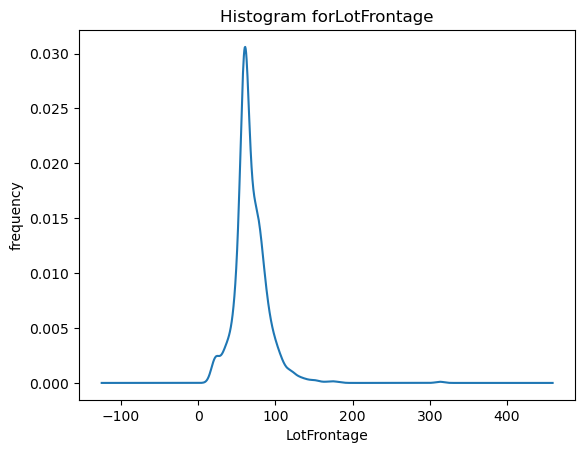

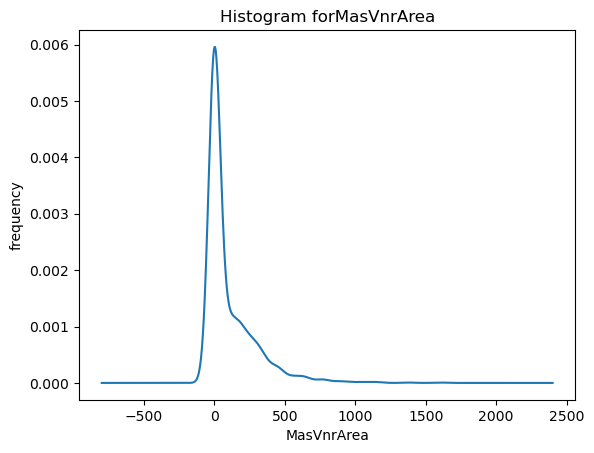

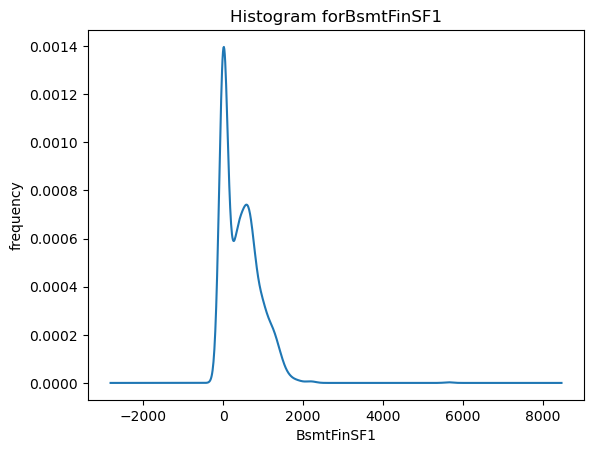

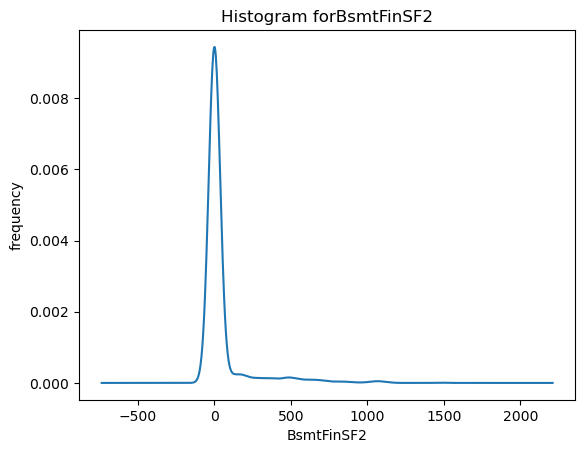

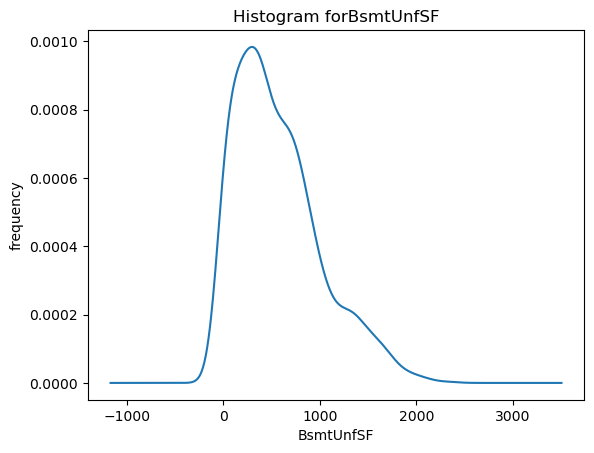

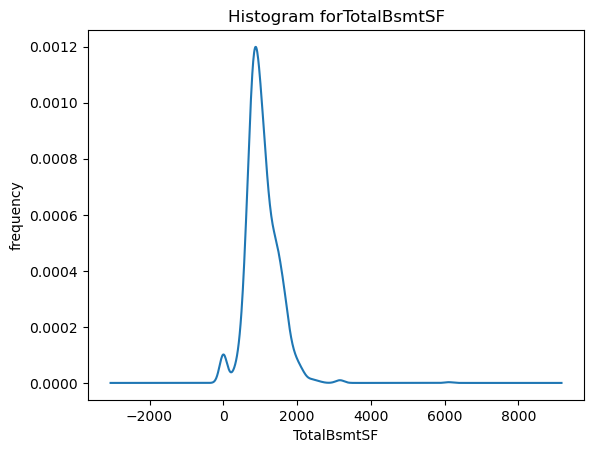

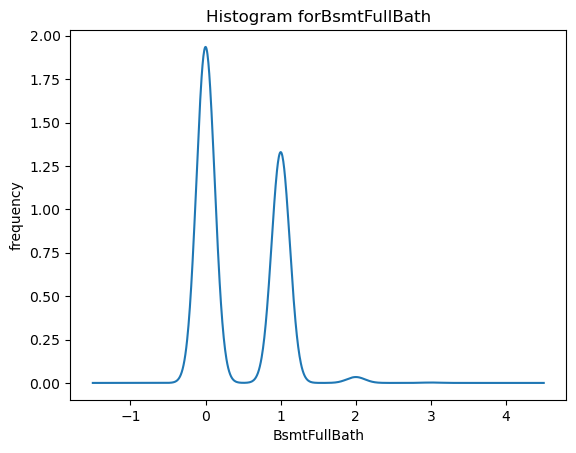

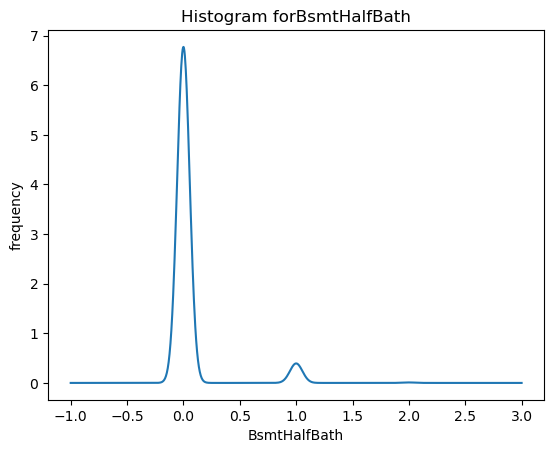

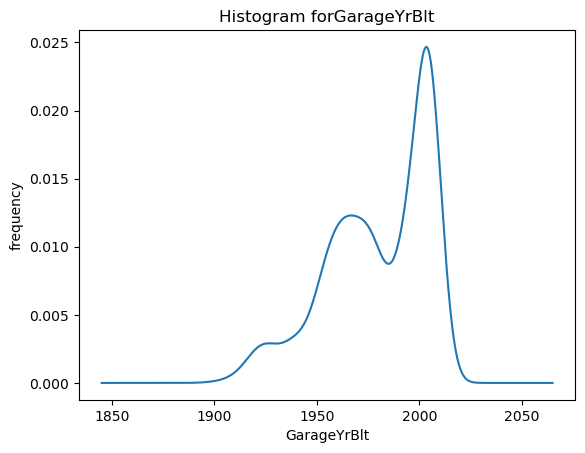

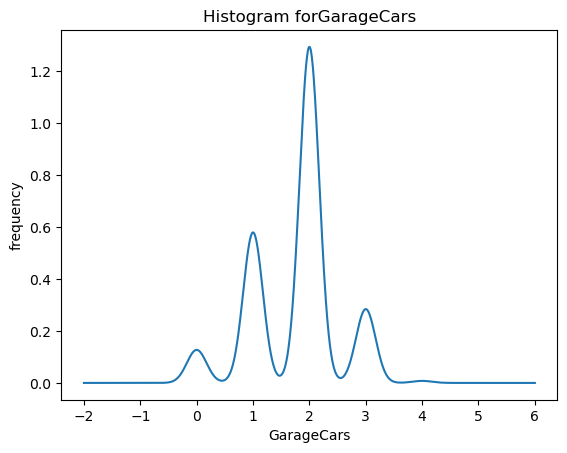

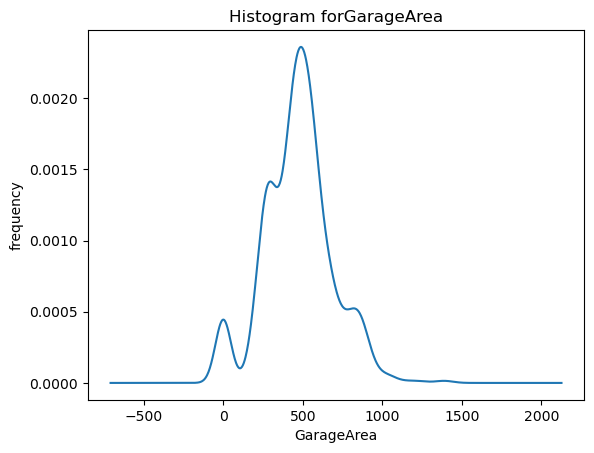

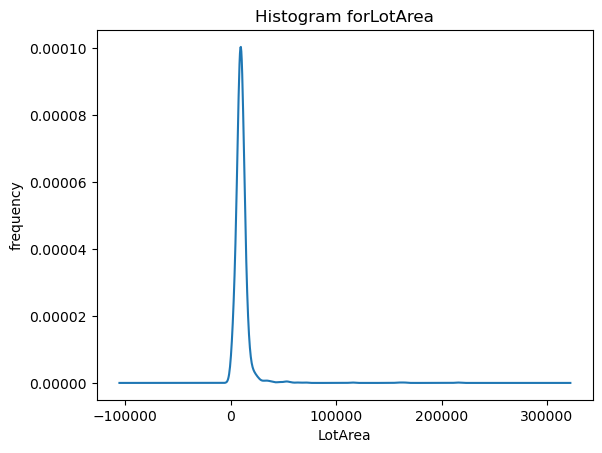

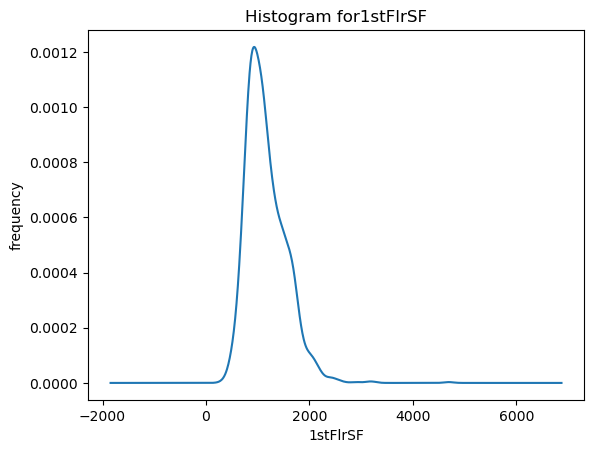

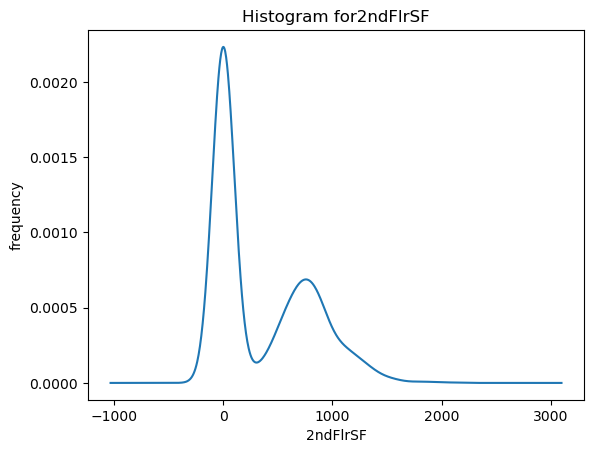

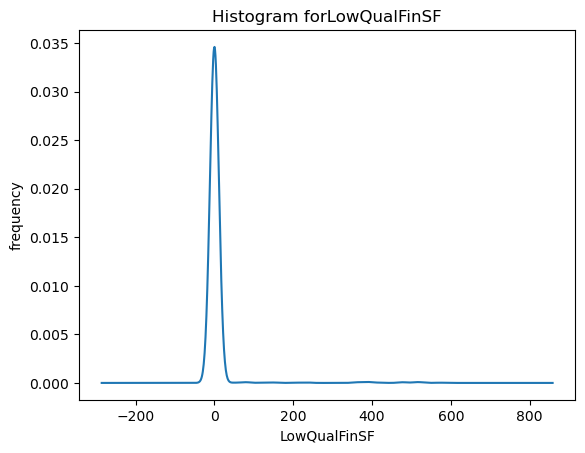

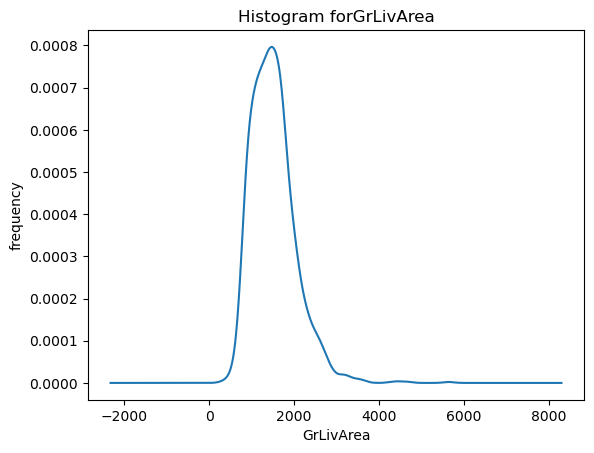

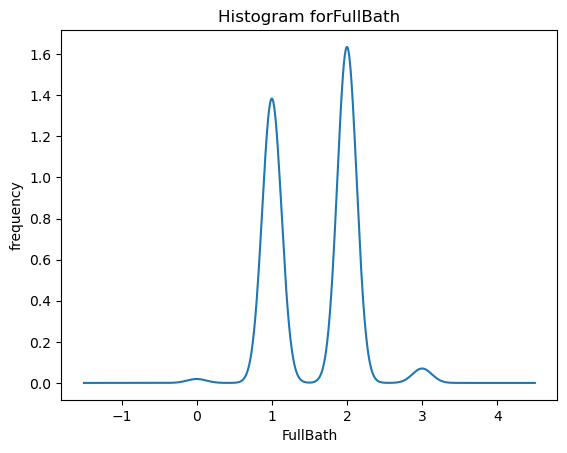

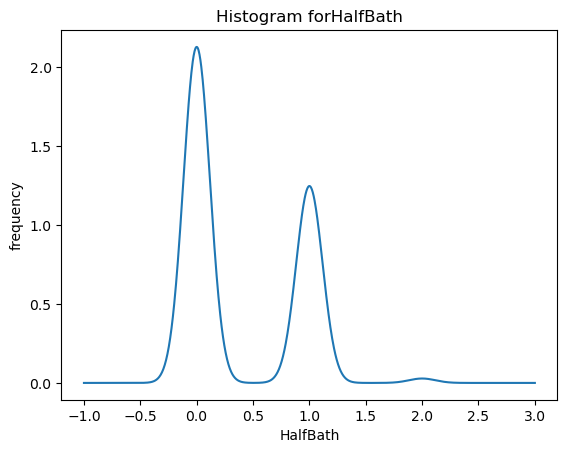

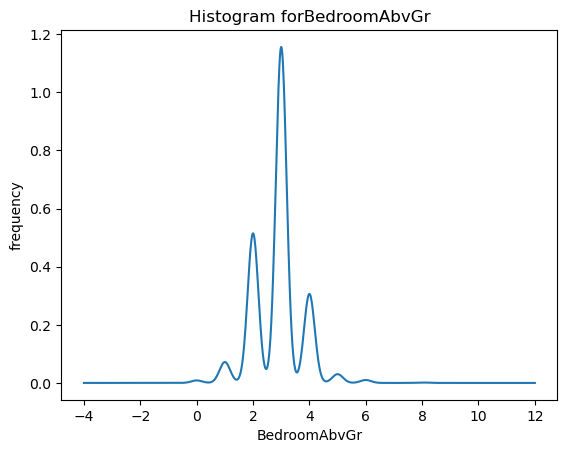

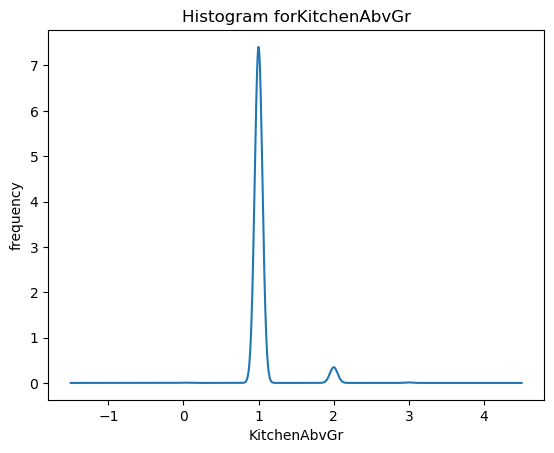

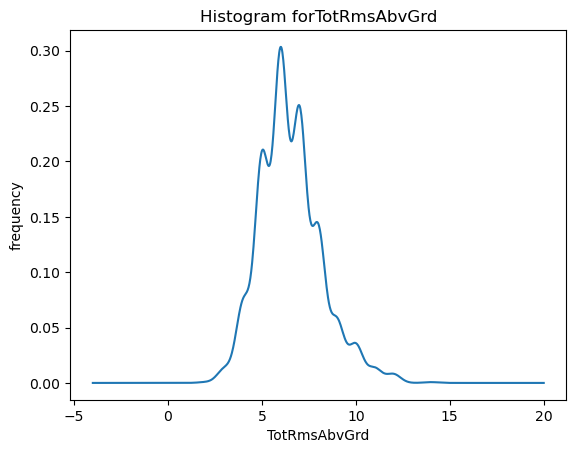

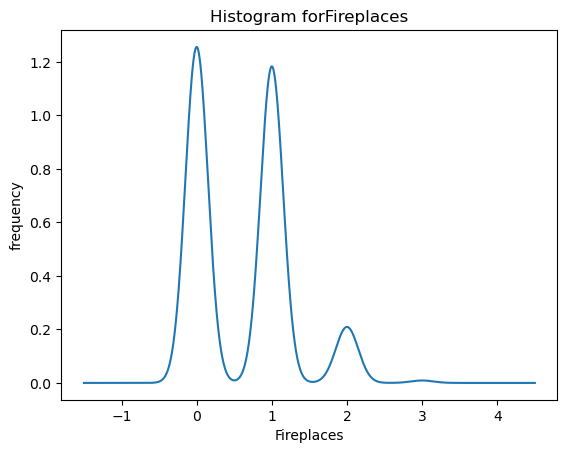

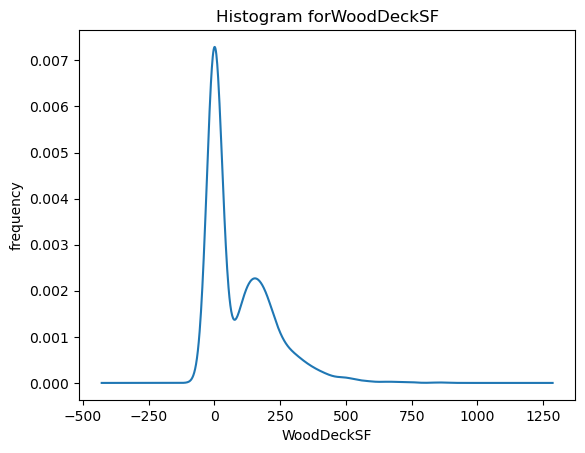

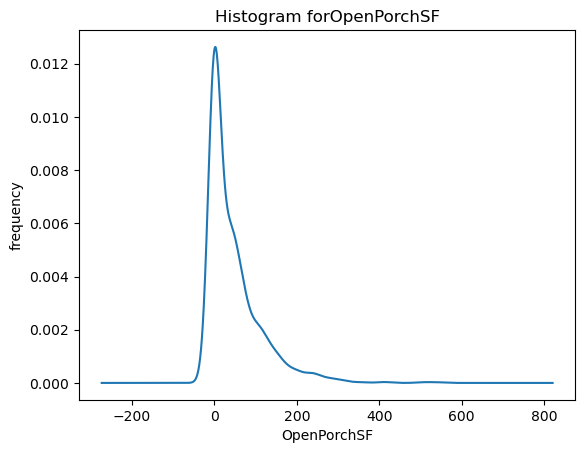

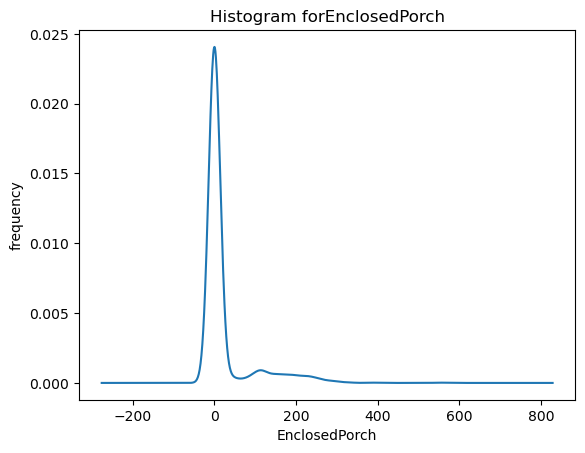

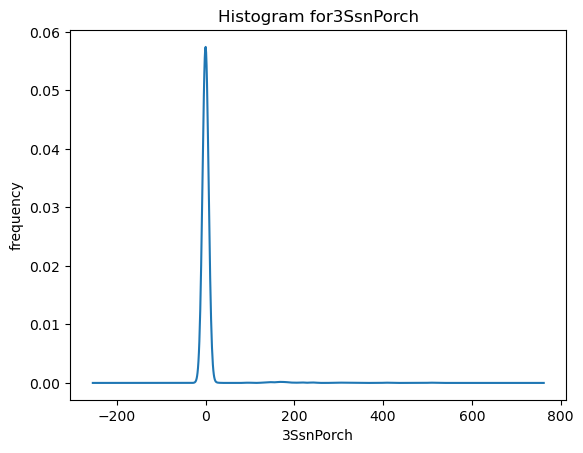

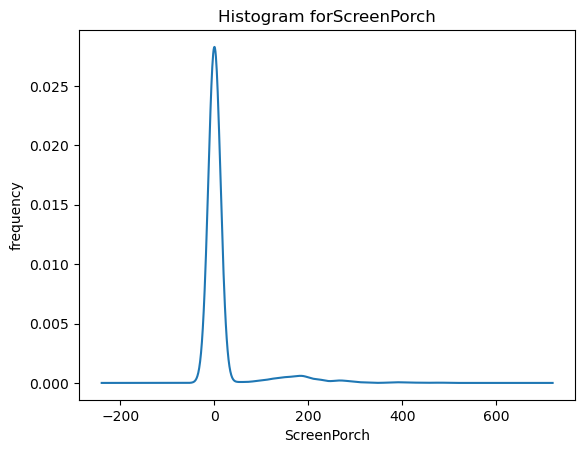

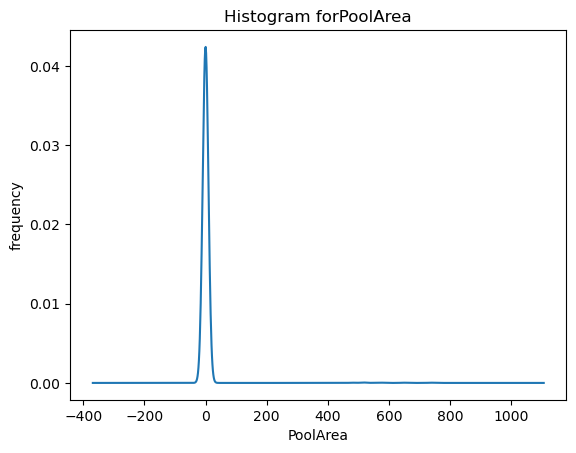

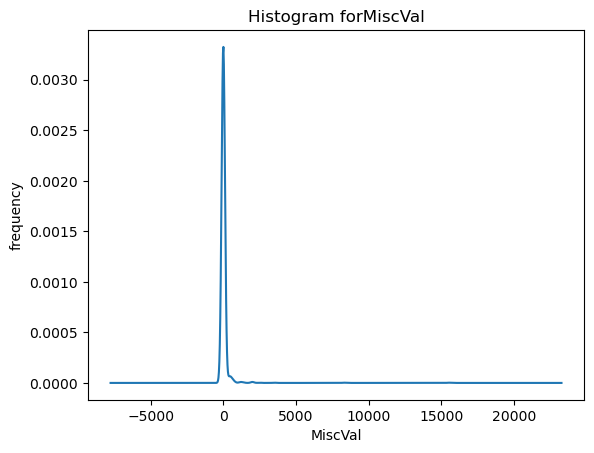

In [ ]:
import matplotlib.pyplot as plt
features=num.columns
for feature in features:
    plt.figure()
    num[feature].plot(kind='kde',title=f'Histogram for{feature}')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

OUTLIER VISUALIZATION USING BOXPLOT

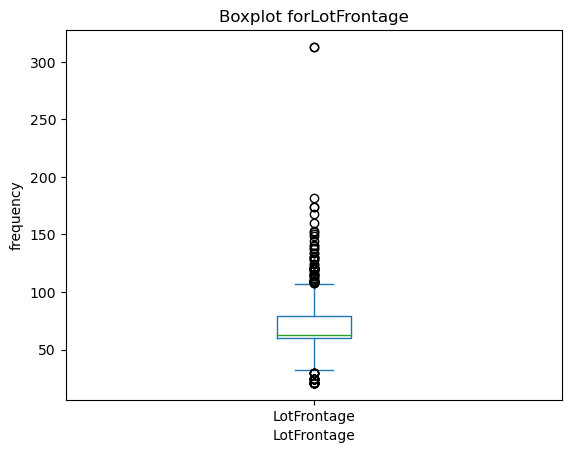

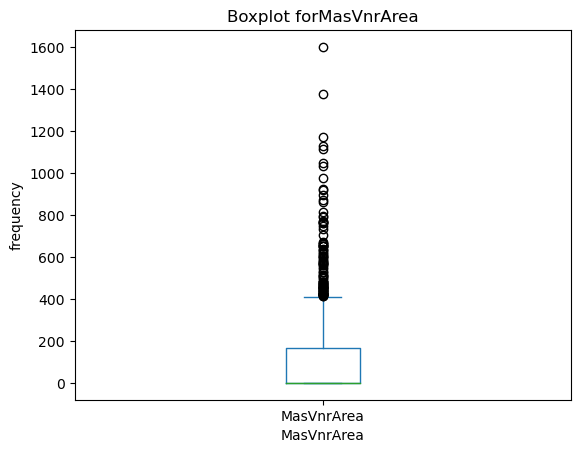

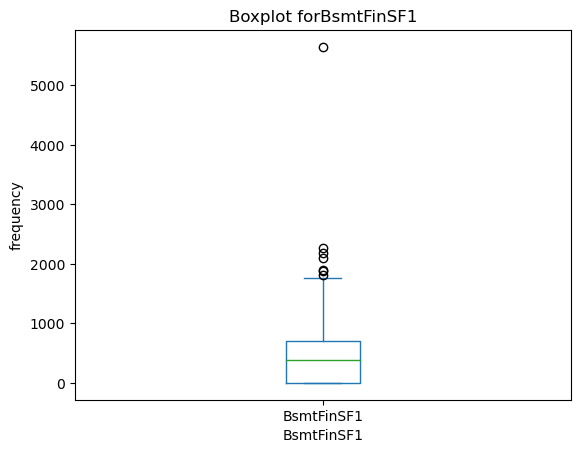

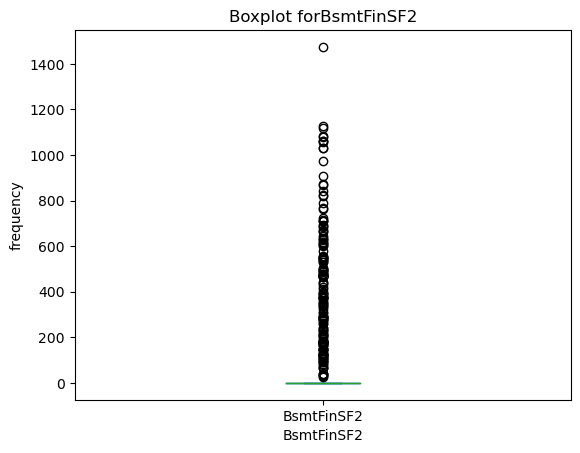

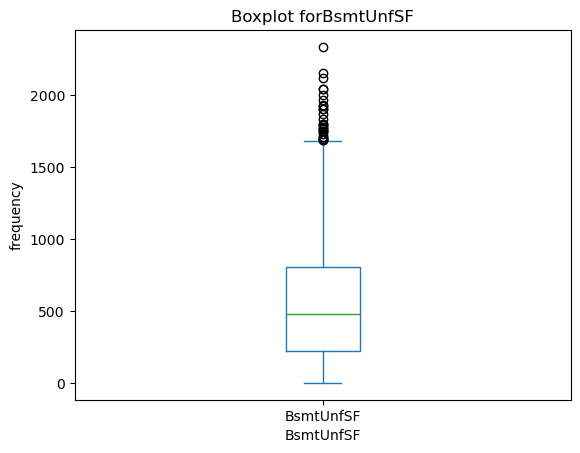

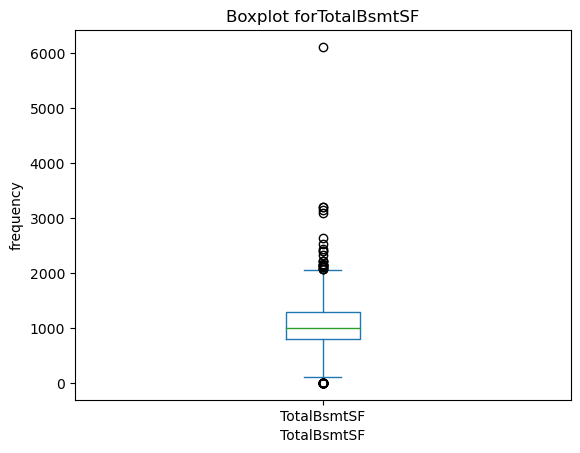

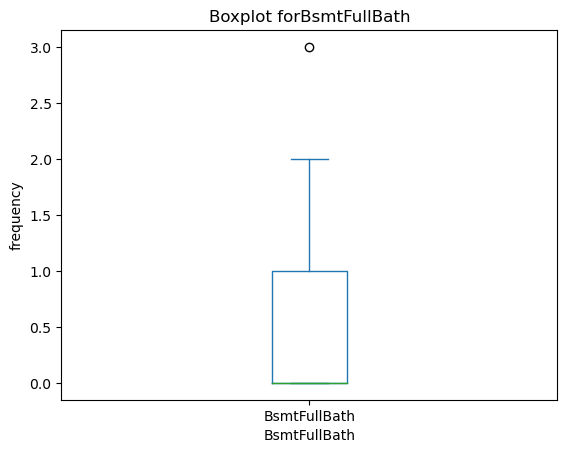

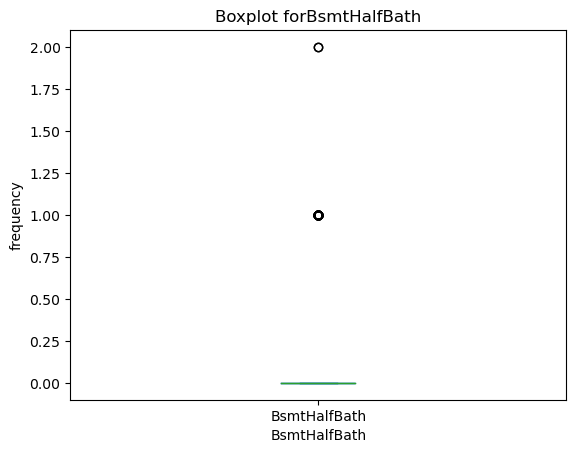

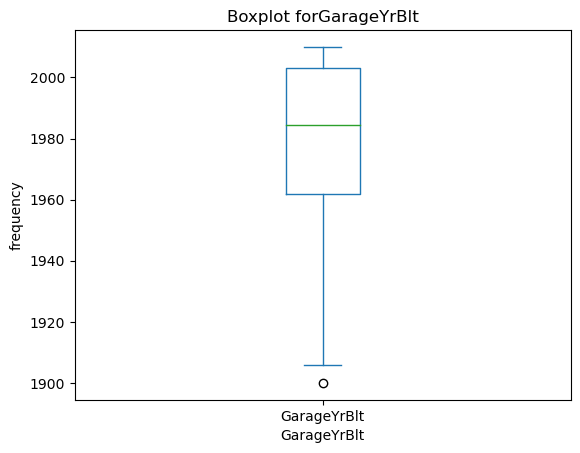

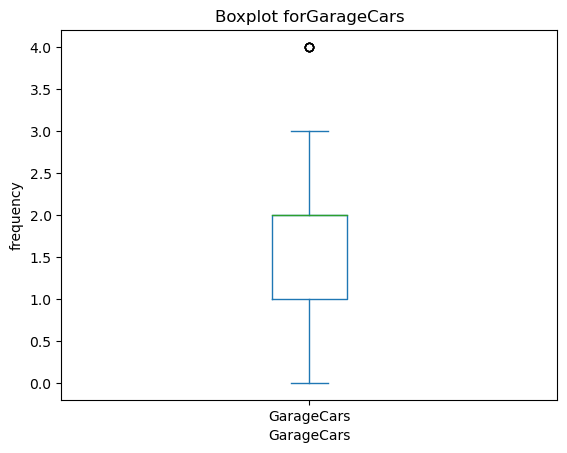

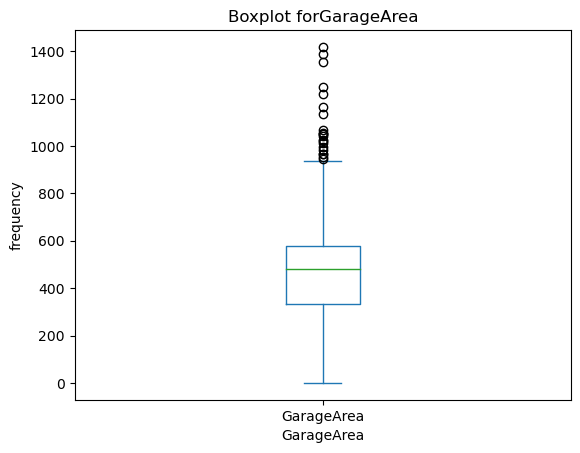

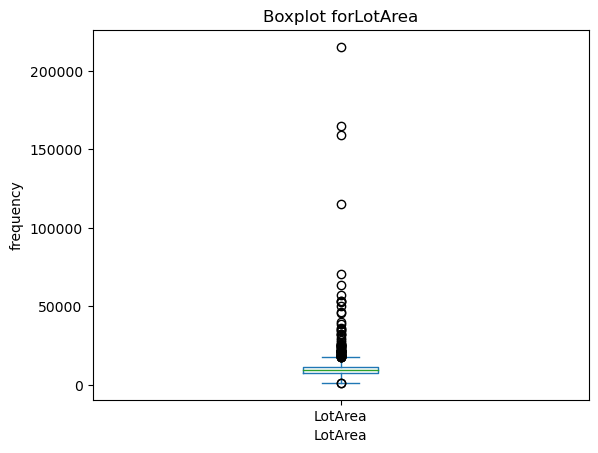

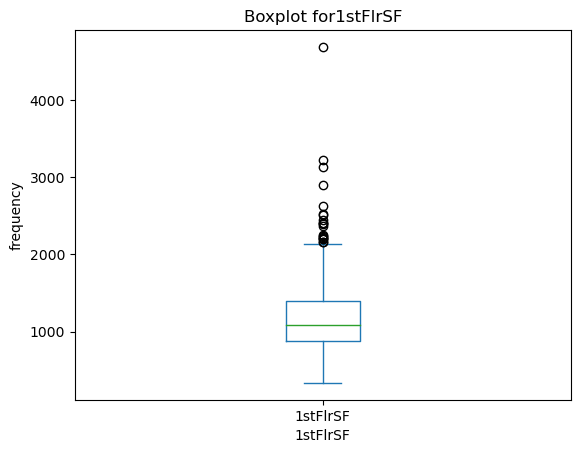

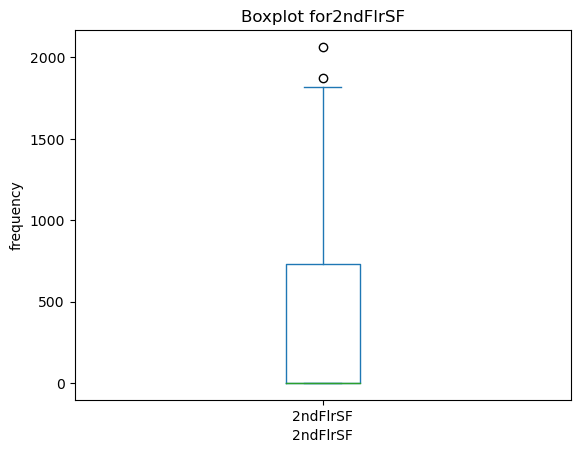

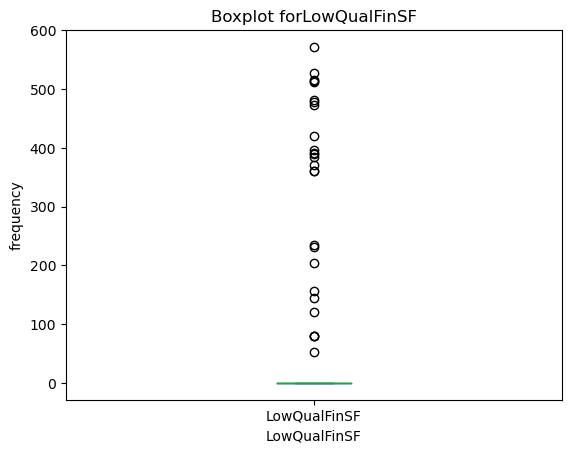

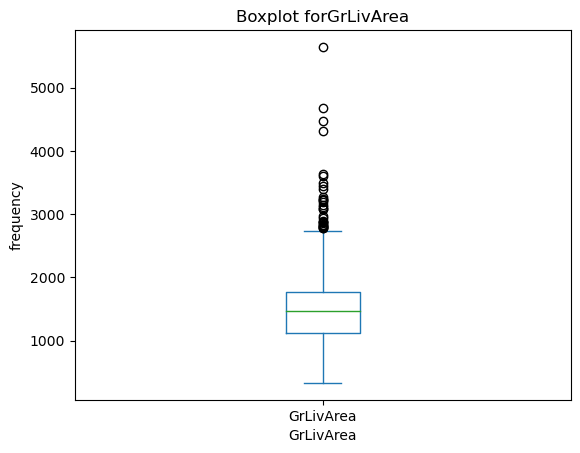

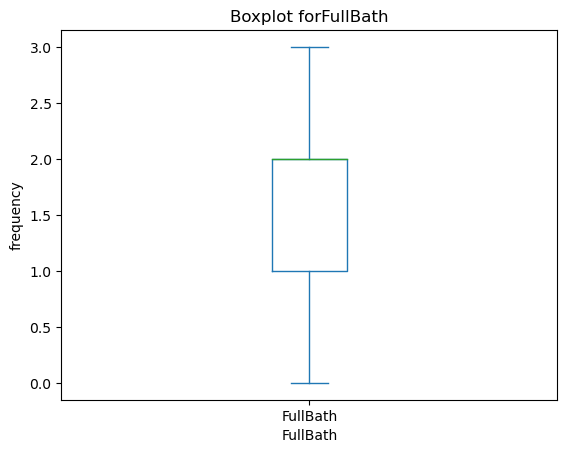

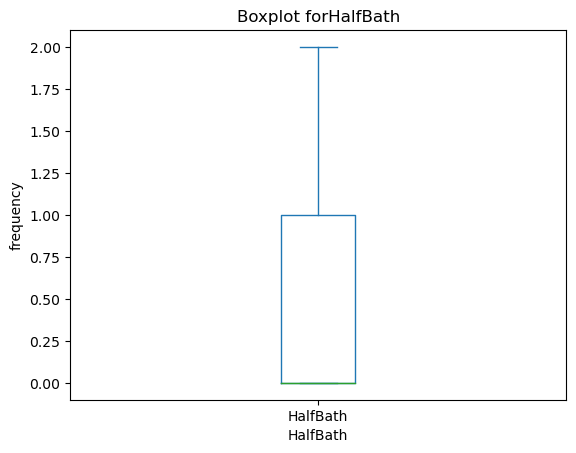

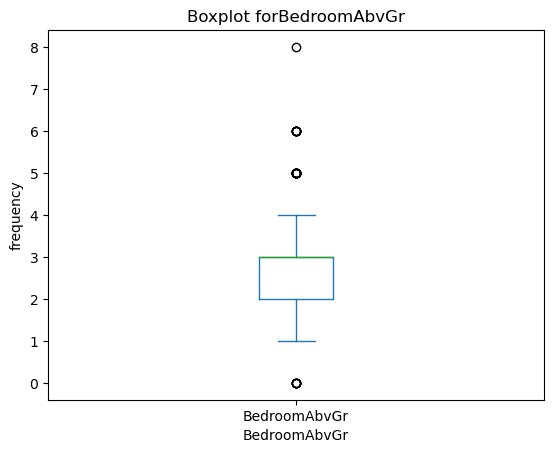

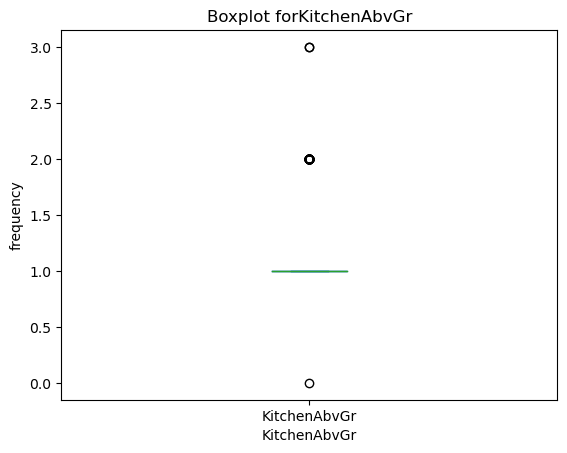

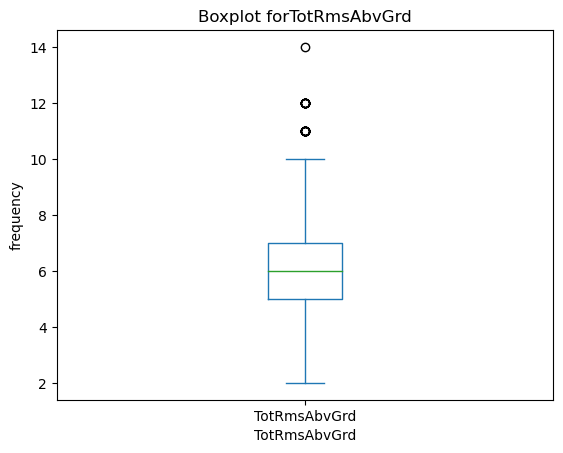

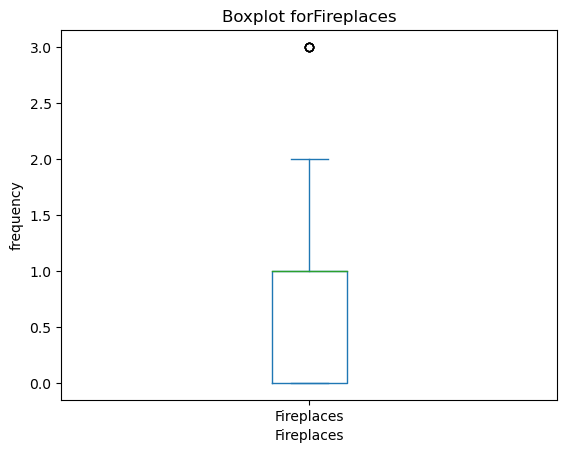

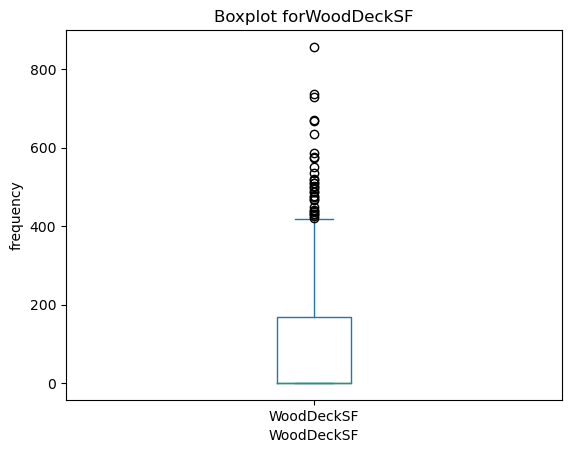

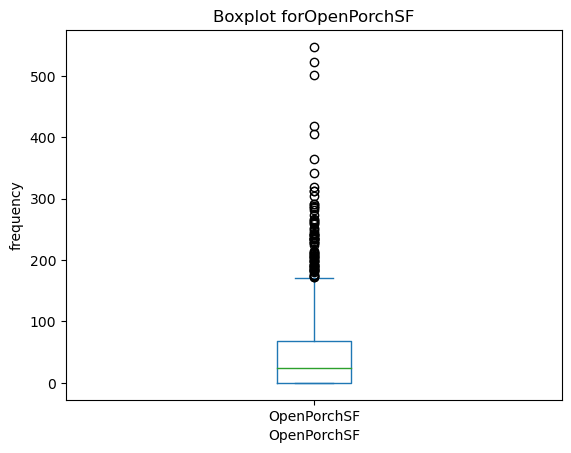

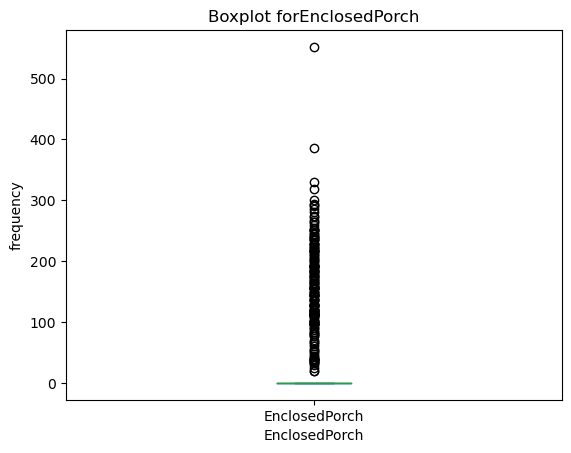

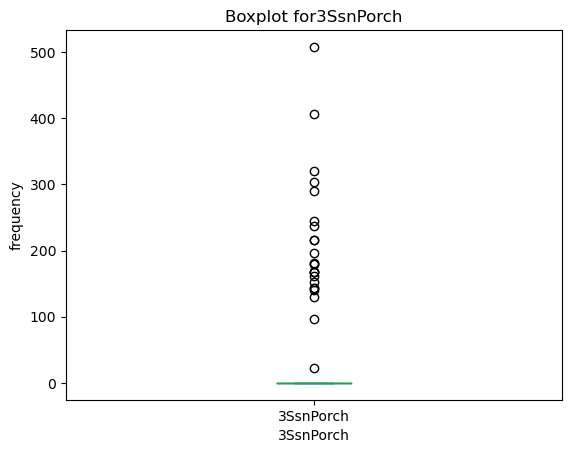

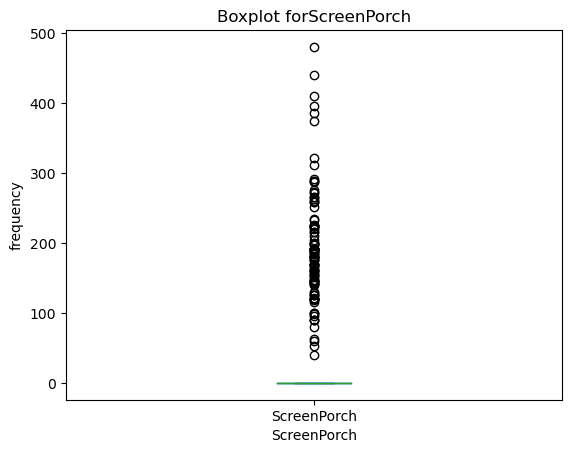

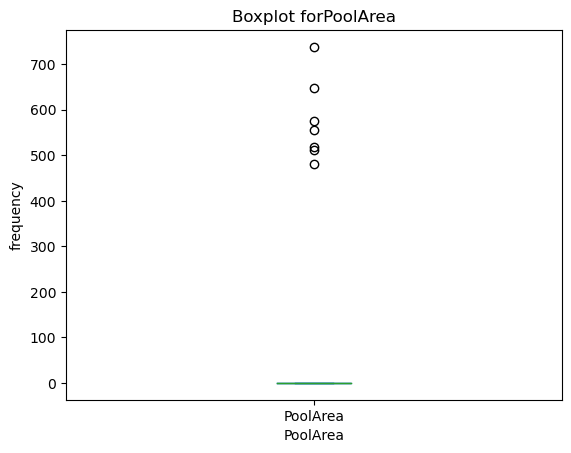

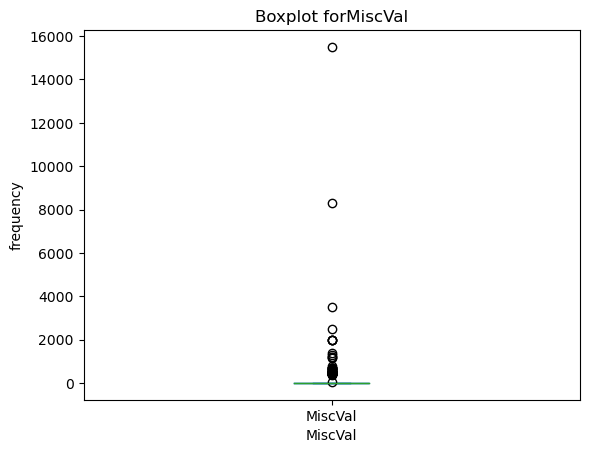

In [ ]:
features=num.columns
for feature in features:
    plt.figure()
    num[feature].plot(kind='box',title=f'Boxplot for{feature}')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

JOINING OF DATAFRAMES AND REMOVING OF OUTLIERS IN THE COMBINED DATAFRAME

In [ ]:
num.shape

(1460, 29)

In [ ]:
df1=pd.concat([num,col_f,y],axis=1)

REMOVAL OF OUTLIERS IN NUMERICAL FEATURES

In [ ]:
for column in df1.select_dtypes(include=['number']).columns:
    Q1=df1[column].quantile(0.25)
    Q3=df1[column].quantile(0.75)
    IQR=Q3-Q1
    lowerbound=Q1-1.5*(IQR)
    upperbound=Q3+1.5*(IQR)
    df1=df1[(df1[column]>=lowerbound)& (df1[column]<=upperbound)]

print(df1)

      LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            65.0       196.0       706.0         0.0      150.0        856.0   
2            68.0       162.0       486.0         0.0      434.0        920.0   
4            84.0       350.0       655.0         0.0      490.0       1145.0   
6            75.0       186.0      1369.0         0.0      317.0       1686.0   
10           70.0         0.0       906.0         0.0      134.0       1040.0   
...           ...         ...         ...         ...        ...          ...   
1448         70.0         0.0         0.0         0.0      560.0        560.0   
1451         78.0       194.0         0.0         0.0     1573.0       1573.0   
1452         35.0        80.0       547.0         0.0        0.0        547.0   
1454         62.0         0.0       410.0         0.0      811.0       1221.0   
1455         62.0         0.0         0.0         0.0      953.0        953.0   

      BsmtFullBath  BsmtHal

In [ ]:
df1

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,...,0,0,0,1,0,0,0,1,0,208500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,...,0,0,0,1,0,0,0,1,0,223500.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,...,0,0,0,1,0,0,0,1,0,250000.0
6,75.0,186.0,1369.0,0.0,317.0,1686.0,1.0,0.0,2004.0,2.0,...,0,0,0,1,0,0,0,1,0,307000.0
10,70.0,0.0,906.0,0.0,134.0,1040.0,1.0,0.0,1965.0,1.0,...,0,0,0,1,0,0,0,1,0,129500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,70.0,0.0,0.0,0.0,560.0,560.0,0.0,0.0,1950.0,1.0,...,0,0,0,1,0,0,0,1,0,112000.0
1451,78.0,194.0,0.0,0.0,1573.0,1573.0,0.0,0.0,2008.0,3.0,...,0,1,0,0,0,0,0,0,1,287090.0
1452,35.0,80.0,547.0,0.0,0.0,547.0,1.0,0.0,2005.0,2.0,...,0,0,0,1,0,0,0,1,0,145000.0
1454,62.0,0.0,410.0,0.0,811.0,1221.0,1.0,0.0,2004.0,2.0,...,0,0,0,1,0,0,0,1,0,185000.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 1455
Columns: 226 entries, LotFrontage to SalePrice
dtypes: float64(12), int64(18), object(196)
memory usage: 1.0+ MB


In [ ]:
df1.drop('BsmtUnfSF',axis=1,inplace=True)

In [ ]:
df1.shape

(584, 225)

In [ ]:
y=df1['SalePrice']
X=df1.drop('SalePrice',axis=1)

In [ ]:
X

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,196.0,706.0,0.0,856.0,1.0,0.0,2003.0,2.0,548.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,162.0,486.0,0.0,920.0,1.0,0.0,2001.0,2.0,608.0,...,0,0,0,0,1,0,0,0,1,0
4,84.0,350.0,655.0,0.0,1145.0,1.0,0.0,2000.0,3.0,836.0,...,0,0,0,0,1,0,0,0,1,0
6,75.0,186.0,1369.0,0.0,1686.0,1.0,0.0,2004.0,2.0,636.0,...,0,0,0,0,1,0,0,0,1,0
10,70.0,0.0,906.0,0.0,1040.0,1.0,0.0,1965.0,1.0,384.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,70.0,0.0,0.0,0.0,560.0,0.0,0.0,1950.0,1.0,384.0,...,0,0,0,0,1,0,0,0,1,0
1451,78.0,194.0,0.0,0.0,1573.0,0.0,0.0,2008.0,3.0,840.0,...,0,0,1,0,0,0,0,0,0,1
1452,35.0,80.0,547.0,0.0,547.0,1.0,0.0,2005.0,2.0,525.0,...,0,0,0,0,1,0,0,0,1,0
1454,62.0,0.0,410.0,0.0,1221.0,1.0,0.0,2004.0,2.0,400.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
columnname=X.columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(X)
x=pd.DataFrame(x,columns=columnname)

In [ ]:
x

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.052514,1.262745,0.735270,0.0,-0.592810,1.188791,0.0,0.741152,0.332940,0.438375,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737
1,0.164477,0.923420,0.172454,0.0,-0.377605,1.188791,0.0,0.654524,0.332940,0.760800,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737
2,1.321760,2.799689,0.604799,0.0,0.378975,1.188791,0.0,0.611211,1.828606,1.986015,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737
3,0.670788,1.162944,2.431393,0.0,2.198131,1.188791,0.0,0.784465,0.332940,0.911265,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737
4,0.309137,-0.693364,1.246921,0.0,0.025905,1.188791,0.0,-0.904764,-1.162727,-0.442920,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0.309137,-0.693364,-1.070857,0.0,-1.588134,-0.841191,0.0,-1.554468,-1.162727,-0.442920,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737
580,0.887779,1.242785,-1.070857,0.0,1.818160,-0.841191,0.0,0.957719,1.828606,2.007510,...,-0.058621,-0.058621,2.901612,-0.058621,-2.327570,-0.041416,0.0,-0.110144,-2.075835,2.875733
581,-2.222419,0.105048,0.328508,0.0,-1.631847,1.188791,0.0,0.827779,0.332940,0.314778,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737
582,-0.269504,-0.693364,-0.021973,0.0,0.634532,1.188791,0.0,0.784465,0.332940,-0.356940,...,-0.058621,-0.058621,-0.344636,-0.058621,0.429633,-0.041416,0.0,-0.110144,0.481734,-0.347737


In [ ]:
#y.shape
y.isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lcv=LassoCV(cv=3)
lcv.fit(x_train,y_train)
bestalpha=lcv.alpha_
lcv_final=LassoCV(alphas=[bestalpha])
lcv_final.fit(x_train,y_train)
y_pred=lcv_final.predict(x_test)


In [ ]:
r_squared=r2_score(y_test,y_pred)
print(r_squared)

0.8885348318596201


In [ ]:
n=x_test.shape[0]
p=x_test.shape[1]
adjusted_r2=1-(1-r_squared)*((n-1)/(n-p-1))
print(adjusted_r2)

1.1197218472618895


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
x_pca.shape

(584, 102)

In [ ]:
x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)
lcv_final.fit(x_pca_train,y_train)
y_pca_pred=lcv_final.predict(x_pca_test)


In [ ]:
r_squared=r2_score(y_test,y_pca_pred)
print(r_squared)

0.872479496671798


In [ ]:
#sns.lmplot(x='x',y='y',data=df1)

ARTIFICIAL NEURAL NETWORK 

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import PReLU,ELU,LeakyReLU 



In [ ]:
X

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,196.0,706.0,0.0,856.0,1.0,0.0,2003.0,2.0,548.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,162.0,486.0,0.0,920.0,1.0,0.0,2001.0,2.0,608.0,...,0,0,0,0,1,0,0,0,1,0
4,84.0,350.0,655.0,0.0,1145.0,1.0,0.0,2000.0,3.0,836.0,...,0,0,0,0,1,0,0,0,1,0
6,75.0,186.0,1369.0,0.0,1686.0,1.0,0.0,2004.0,2.0,636.0,...,0,0,0,0,1,0,0,0,1,0
10,70.0,0.0,906.0,0.0,1040.0,1.0,0.0,1965.0,1.0,384.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,70.0,0.0,0.0,0.0,560.0,0.0,0.0,1950.0,1.0,384.0,...,0,0,0,0,1,0,0,0,1,0
1451,78.0,194.0,0.0,0.0,1573.0,0.0,0.0,2008.0,3.0,840.0,...,0,0,1,0,0,0,0,0,0,1
1452,35.0,80.0,547.0,0.0,547.0,1.0,0.0,2005.0,2.0,525.0,...,0,0,0,0,1,0,0,0,1,0
1454,62.0,0.0,410.0,0.0,1221.0,1.0,0.0,2004.0,2.0,400.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
xn_train,xn_test,yn_train,yn_test=train_test_split(X,y,test_size=0.2,random_state=42)
xn_train = scaler.fit_transform(xn_train)
xn_test = scaler.transform(xn_test)

In [ ]:
xn_train

array([[ 0.46183178, -0.68854326,  1.00923338, ..., -0.12335879,
        -2.07528749,  2.95451632],
       [ 0.31580914, -0.23456225,  0.41011122, ...,  8.10643483,
        -2.07528749, -0.33846488],
       [-0.41430407, -0.50695086, -1.09537521, ..., -0.12335879,
         0.48186095, -0.33846488],
       ...,
       [-0.70634936, -0.68854326, -1.09537521, ..., -0.12335879,
         0.48186095, -0.33846488],
       [-0.41430407, -0.68854326, -0.3528734 , ..., -0.12335879,
         0.48186095, -0.33846488],
       [ 1.92205821,  2.82224319,  0.24624876, ..., -0.12335879,
         0.48186095, -0.33846488]])

In [ ]:
xn_test=pd.DataFrame(xn_test,columns=columnname)
xn_train=pd.DataFrame(xn_train,columns=columnname)

In [ ]:
xn_train

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.461832,-0.688543,1.009233,0.0,-0.451028,1.130508,0.0,0.997187,0.345833,0.958776,...,-0.046324,-0.065583,2.989343,-0.046324,-2.342245,-0.046324,0.0,-0.123359,-2.075287,2.954516
1,0.315809,-0.234562,0.410111,0.0,-0.083360,-0.884558,0.0,-1.148227,-1.192300,-1.154139,...,-0.046324,-0.065583,-0.334522,-0.046324,0.426941,-0.046324,0.0,8.106435,-2.075287,-0.338465
2,-0.414304,-0.506951,-1.095375,0.0,1.133286,-0.884558,0.0,0.734483,0.345833,-0.254796,...,-0.046324,-0.065583,-0.334522,-0.046324,0.426941,-0.046324,0.0,-0.123359,0.481861,-0.338465
3,-0.414304,-0.688543,-0.253020,0.0,-0.029882,1.130508,0.0,-2.680666,-1.192300,-1.229987,...,-0.046324,-0.065583,-0.334522,-0.046324,0.426941,-0.046324,0.0,-0.123359,0.481861,-0.338465
4,-0.414304,1.127381,1.301113,0.0,-0.330701,1.130508,0.0,-0.272548,0.345833,1.110472,...,-0.046324,-0.065583,-0.334522,-0.046324,0.426941,-0.046324,0.0,-0.123359,0.481861,-0.338465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,1.045922,-0.688543,-1.095375,0.0,0.287650,-0.884558,0.0,0.734483,0.345833,-0.146441,...,-0.046324,-0.065583,-0.334522,-0.046324,0.426941,-0.046324,0.0,-0.123359,0.481861,-0.338465
463,-2.312598,0.986142,1.219182,0.0,0.932740,1.130508,0.0,0.953403,0.345833,0.861257,...,-0.046324,15.247951,-0.334522,-0.046324,-2.342245,-0.046324,0.0,-0.123359,0.481861,-0.338465
464,-0.706349,-0.688543,-1.095375,0.0,-2.556762,-0.884558,0.0,0.822051,-2.730433,-2.530242,...,-0.046324,-0.065583,-0.334522,-0.046324,0.426941,-0.046324,0.0,-0.123359,0.481861,-0.338465
465,-0.414304,-0.688543,-0.352873,0.0,-2.489914,-0.884558,0.0,-2.461746,-1.192300,-1.197481,...,-0.046324,-0.065583,-0.334522,-0.046324,0.426941,-0.046324,0.0,-0.123359,0.481861,-0.338465


In [ ]:
regressor=Sequential()

In [ ]:
regressor.add(Dense(units=224, activation='LeakyReLU'))



In [ ]:
regressor.add(Dense(units=112, activation='LeakyReLU'))
#regressor.add(Dropout(0.3))

In [ ]:
regressor.add(Dense(units=56, activation='LeakyReLU'))
#regressor.add(Dropout(0.3))

In [ ]:
regressor.add(Dense(units=1, activation='linear'))


In [ ]:
regressor.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
#early_stopping=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model=regressor.fit(xn_train,yn_train,validation_split=0.1,batch_size=5,epochs=100)

Epoch 1/100


84/84 [==============================] - 1s 6ms/step - loss: 274616832.0000 - accuracy: 0.0000e+00 - val_loss: 1770294912.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
84/84 [==============================] - 0s 4ms/step - loss: 264517440.0000 - accuracy: 0.0000e+00 - val_loss: 1755690496.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
84/84 [==============================] - 0s 4ms/step - loss: 262165936.0000 - accuracy: 0.0000e+00 - val_loss: 1767910144.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
84/84 [==============================] - 0s 4ms/step - loss: 242971072.0000 - accuracy: 0.0000e+00 - val_loss: 1726369408.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 232195296.0000 - accuracy: 0.0000e+00 - val_loss: 1759092864.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 226268576.0000 - accuracy: 0.0000e+00 - val_loss: 1696948096.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
84/8

In [ ]:
y

0       208500.0
2       223500.0
4       250000.0
6       307000.0
10      129500.0
          ...   
1448    112000.0
1451    287090.0
1452    145000.0
1454    185000.0
1455    175000.0
Name: SalePrice, Length: 584, dtype: float64